In [13]:
import numpy as np 
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats
%matplotlib inline

The model is specified by 
\begin{align}
    B^T_A W
        &= \frac{1}{\beta} [ W^0 + \alpha_1 \sum_{i=1}^D W_i^1(A) \\
        &+ \alpha_2 \sum_{j=1}^D \sum_{k=j+1} W^2_{j,k}(A)
\end{align}

where
* $B_A^T$ is a feature vector that represents which combination of widgets to show
* $W_0$ is the mean click through rate
* $W_1$ is a vector with first-order interaction parameters (i.e. how each asset influences the click through rate)
* $W_2$ is a matrix with second-order interaction parameters (i.e. the influence of combinations of assets on the click through rate
* $\beta$ is a scaling parameter

# Examples

## Example 1

* 2 asset types, headers and images, with $N_1=3$, $N_2=2$

In [131]:
N_1 = 3
N_2 = 2
N = N_1 + N_2

* layouts

In [132]:
layouts = list(itertools.product(range(N_1), range(N_2)))
layouts = pd.get_dummies(pd.DataFrame(layouts).astype(str), prefix=['header', 'image'])
layouts = layouts.values
layouts

array([[1, 0, 0, 1, 0],
       [1, 0, 0, 0, 1],
       [0, 1, 0, 1, 0],
       [0, 1, 0, 0, 1],
       [0, 0, 1, 1, 0],
       [0, 0, 1, 0, 1]], dtype=uint8)

* $W_0 \sim N(0,1)$
* $W_1 \sim N(0,1)$ 
* $W_2 \sim N(0,1)$

In [133]:
W_0 = -10
W_1 = np.random.normal(size=N)
W_2 = np.random.normal(size=(N, N))

In [134]:
W_0, W_1, W_2

(-10,
 array([ 1.2776918 , -0.04241037, -1.2619989 ,  0.02590192, -0.35875421]),
 array([[-0.73849559, -0.584075  ,  2.09625028,  0.28317341,  0.17779163],
        [ 0.83432307, -1.37570634, -1.62337365, -0.04956344, -1.04523931],
        [-0.9439031 , -0.60096151,  1.72017604, -0.65726767,  0.3704291 ],
        [-0.85496662,  0.21697136, -0.83000828,  0.53105798,  0.33135   ],
        [ 0.73221154, -1.23779031, -0.64880238, -1.26091274,  0.27811647]]))

* $\alpha_1$ = 1
* $\alpha_2$ = 0.5

In [135]:
α_1 = 1
α_2 = 0.5

In [136]:
A_1 = layouts[0]
A_1

array([1, 0, 0, 1, 0], dtype=uint8)

In [137]:
def compute_variance(β):
    values = [(1/β) * (
        W_0 
        + α_1 * np.dot(A, W_1) 
        + α_2 * np.sum(np.triu(np.outer(A, A), 1) * W_2)
    ) for A in layouts]
    return np.var(values)

def find_beta(desired_variance, initial_guess=10):
    return scipy.optimize.fsolve(
        lambda x: compute_variance(x) - desired_variance, 
        initial_guess
    )

In [138]:
desired_variance = 0.02
β = find_beta(desired_variance)
β

array([8.20940517])

$P(R|A_1) = \Phi ( R * B^T_A W)$

In [139]:
# In the paper they do not mention how they get the mean around 0.12
# Here we subtract 0.3 from the values, as the mean is around 0.5
scipy.stats.norm.cdf(
    1 * (1 / β) * (
        W_0 
        + α_1 * np.dot(A_1, W_1) 
        + α_2 * np.sum(np.triu(np.outer(A_1, A_1), 1) * W_2)
    )
)

array([0.14868835])

* $A_2$ = [1, 0, 1]

In [140]:
A_2 = layouts[2]
A_2

array([0, 1, 0, 1, 0], dtype=uint8)

$P(R|A_2) = \Phi ( R * B^T_A W)$

In [141]:
# In the paper they do not mention how they get the mean around 0.12
# Here we subtract 0.3 from the values, as the mean is around 0.5
scipy.stats.norm.cdf(
    1 * (1 / β) * (
        W_0 
        + α_1 * np.dot(A_2, W_1) 
        + α_2 * np.sum(np.triu(np.outer(A_2, A_2), 1) * W_2)
    )
)

array([0.11063753])

In [142]:
all_products = [
    (1 / β) * (
        W_0 
        + α_1 * np.dot(A, W_1) 
        + α_2 * np.sum(np.triu(np.outer(A, A), 1) * W_2)
    ) for A in layouts
]

In [143]:
all_probabilities = [
    scipy.stats.norm.cdf(
        1 * product
    )[0] for product in all_products
]

In [144]:
all_probabilities

[0.1486883503427746,
 0.13668180805548374,
 0.11063752983964398,
 0.0916533192804127,
 0.07945939365182692,
 0.08181289464680663]

<AxesSubplot:ylabel='Count'>

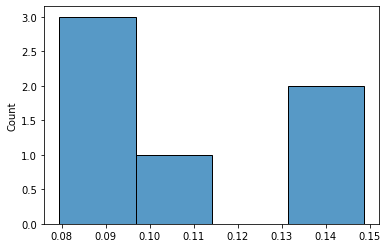

In [145]:
sns.histplot(all_probabilities)

## Example 2

In [87]:
N_1 = 10
N_2 = 15
N = N_1 + N_2

In [88]:
layouts = list(itertools.product(range(N_1), range(N_2)))
layouts = pd.get_dummies(pd.DataFrame(layouts).astype(str), prefix=['header', 'image'])
layouts = layouts.values

In [89]:
W_0 = -10
W_1 = np.random.normal(size=N)
W_2 = np.random.normal(size=(N, N))

In [90]:
α_1 = 1
α_2 = 2

In [91]:
def compute_variance(β):
    values = [(1/β) * (
        W_0 
        + α_1 * np.dot(A, W_1) 
        + α_2 * np.sum(np.triu(np.outer(A, A), 1) * W_2)
    ) for A in layouts]
    return np.var(values)

def find_beta(desired_variance, initial_guess=10):
    return scipy.optimize.fsolve(
        lambda x: compute_variance(x) - desired_variance, 
        initial_guess
    )

In [92]:
desired_variance = 0.02
β = find_beta(desired_variance)
β

array([16.7059687])

In [93]:
all_products = [
    (1 / β) * (
        W_0 
        + α_1 * np.dot(A, W_1) 
        + α_2 * np.sum(np.triu(np.outer(A, A), 1) * W_2)
    ) for A in layouts
]

In [96]:
all_probabilities = [
    scipy.stats.norm.cdf(
        1 * product
    )[0] for product in all_products
]

<AxesSubplot:ylabel='Count'>

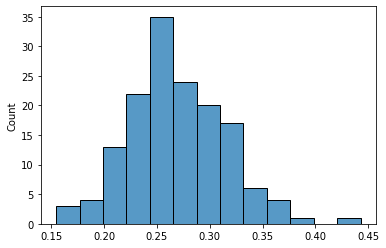

In [97]:
sns.histplot(all_probabilities)